<a href="https://colab.research.google.com/github/GeorgeM2000/Classification-of-Bird-Recordings/blob/main/Birds_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Library & Tools***

In [ ]:
!pip install scikit-multilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 1.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import random
from tqdm import trange
import matplotlib.pyplot as plt
from scipy.stats import randint
from scipy.sparse import issparse
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import BinaryRelevance
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, make_scorer, accuracy_score
from sklearn.metrics import zero_one_loss, coverage_error, label_ranking_loss, label_ranking_average_precision_score
from sklearn.preprocessing import StandardScaler

# ***Data Overview and Exploration***


The dataset has already been split into a training set and a testing set.









In [ ]:
btest = pd.read_csv('birds-test-csv.csv', header=None)
btrain = pd.read_csv('birds-train-csv.csv', header=None)

In [ ]:
btest.head()

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,0.132445,0.143931,0.227729,0.298556,0.385907,0.378363,0.354708,0.384165,0.360092,0.347465,...,0,0,0,0,0,0,0,0,0,0
1,0.101617,0.130342,0.228117,0.281017,0.365804,0.370122,0.359235,0.388608,0.362013,0.348229,...,0,0,1,0,0,0,0,0,0,0
2,0.005148,0.017877,0.042137,0.062124,0.097340,0.088305,0.084337,0.083204,0.074532,0.071497,...,0,1,1,1,0,0,0,0,0,0
3,0.018792,0.012898,0.027330,0.039521,0.064671,0.068329,0.065799,0.059891,0.048287,0.047820,...,0,0,0,0,0,0,0,0,0,0
4,0.007008,0.014610,0.033637,0.042604,0.065649,0.065047,0.064553,0.058155,0.048516,0.047021,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
btrain.head()

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,0.016521,0.039926,0.089632,0.134119,0.170470,0.176872,0.171546,0.182392,0.162482,0.159083,...,0,0,1,1,0,0,0,0,0,0
1,0.006600,0.035984,0.089956,0.123214,0.172273,0.177068,0.165507,0.179655,0.161744,0.163678,...,0,0,0,0,0,0,0,0,0,0
2,0.006894,0.017722,0.048062,0.065802,0.103443,0.091397,0.084931,0.088666,0.075676,0.074408,...,0,1,0,0,0,0,0,0,0,0
3,0.031046,0.127675,0.221428,0.272707,0.358743,0.349389,0.316029,0.330656,0.310752,0.306288,...,0,0,0,0,0,0,0,0,0,0
4,0.064721,0.226644,0.304482,0.274662,0.346980,0.334063,0.307223,0.324666,0.297070,0.292258,...,0,0,0,0,0,0,0,0,0,0


As we can see, initially there are no column names.







In [ ]:
btrain.shape

(322, 279)

In [ ]:
btest.shape

(323, 279)

We need to rename the last 19 columns of both the training and testing sets. These columns represent the target labels or categories, which correspond to bird names.







In [ ]:
new_column_names = [
    "Brown Creeper",
    "Pacific Wren",
    "Pacific-slope Flycatcher",
    "Red-breasted Nuthatch",
    "Dark-eyed Junco",
    "Olive-sided Flycatcher",
    "Hermit Thrush",
    "Chestnut-backed Chickadee",
    "Varied Thrush",
    "Hermit Warbler",
    "Swainson's Thrush",
    "Hammond's Flycatcher",
    "Western Tanager",
    "Black-headed Grosbeak",
    "Golden Crowned Kinglet",
    "Warbling Vireo",
    "MacGillivray's Warbler",
    "Stellar's Jay",
    "Common Nighthawk"
]

In [ ]:
btrain_column_names = btrain.columns
btest_column_names = btest.columns

btrain_mapping_dict = dict(zip(btrain_column_names[-19:], new_column_names))
btest_mapping_dict = dict(zip(btest_column_names[-19:], new_column_names))

btrain.rename(columns=btrain_mapping_dict, inplace=True)
btest.rename(columns=btest_mapping_dict, inplace=True)

In [ ]:
btrain.head().iloc[:,-19:]

,Brown Creeper,Pacific Wren,Pacific-slope Flycatcher,Red-breasted Nuthatch,Dark-eyed Junco,Olive-sided Flycatcher,Hermit Thrush,Chestnut-backed Chickadee,Varied Thrush,Hermit Warbler,Swainson's Thrush,Hammond's Flycatcher,Western Tanager,Black-headed Grosbeak,Golden Crowned Kinglet,Warbling Vireo,MacGillivray's Warbler,Stellar's Jay,Common Nighthawk
0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
btest.head().iloc[:,-19:]

,Brown Creeper,Pacific Wren,Pacific-slope Flycatcher,Red-breasted Nuthatch,Dark-eyed Junco,Olive-sided Flycatcher,Hermit Thrush,Chestnut-backed Chickadee,Varied Thrush,Hermit Warbler,Swainson's Thrush,Hammond's Flycatcher,Western Tanager,Black-headed Grosbeak,Golden Crowned Kinglet,Warbling Vireo,MacGillivray's Warbler,Stellar's Jay,Common Nighthawk
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
btrain.isnull().any(axis=1).sum()

0

In [ ]:
btest.isnull().any(axis=1).sum()

0

We can concatenate the training and testing sets to create one dataset. After that, we shuffle the samples of the newly created dataset.







In [ ]:
birds = pd.concat([btrain, btest], ignore_index=True)

birds = birds.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
birds.shape

(645, 279)

In [ ]:
birds.head().iloc[:,-19:]

,Brown Creeper,Pacific Wren,Pacific-slope Flycatcher,Red-breasted Nuthatch,Dark-eyed Junco,Olive-sided Flycatcher,Hermit Thrush,Chestnut-backed Chickadee,Varied Thrush,Hermit Warbler,Swainson's Thrush,Hammond's Flycatcher,Western Tanager,Black-headed Grosbeak,Golden Crowned Kinglet,Warbling Vireo,MacGillivray's Warbler,Stellar's Jay,Common Nighthawk
0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The dataset contains many bird names (target labels), and as observed below, the target labels are imbalanced. Oversampling and undersampling multi-label samples are beyond the scope of this project, as it is not as straightforward as oversampling for samples with only one class.







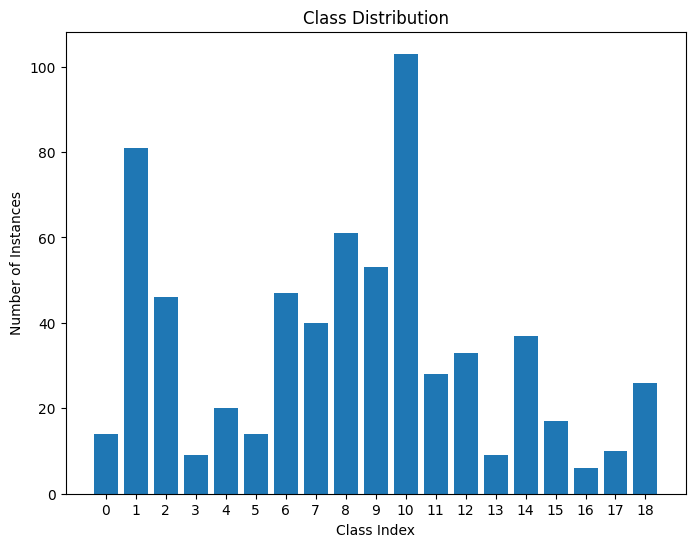

In [ ]:
class_distribution = birds[new_column_names].sum(axis=0)

# Plotting the class distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(class_distribution)), class_distribution)
plt.xticks(range(len(class_distribution)), labels=range(len(class_distribution)))
plt.xlabel('Class Index')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.show()

In [ ]:
samples_with_multiple_classes = birds[new_column_names].sum(axis=1) > 1
print("Number of samples with multiple classes:",samples_with_multiple_classes.value_counts()[True])
print("Number of samples with single class:",samples_with_multiple_classes.value_counts()[False])

Number of samples with multiple classes: 189
Number of samples with single class: 456


Count the number of samples that belong to each target label.

In [ ]:
class_counts = {}

for label in new_column_names:
  class_counts[label] = 0

for index, row in birds.iterrows():
    for class_name in new_column_names:
        if row[class_name] == 1:
            class_counts[class_name] += 1

for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

Brown Creeper: 14
Pacific Wren: 81
Pacific-slope Flycatcher: 46
Red-breasted Nuthatch: 9
Dark-eyed Junco: 20
Olive-sided Flycatcher: 14
Hermit Thrush: 47
Chestnut-backed Chickadee: 40
Varied Thrush: 61
Hermit Warbler: 53
Swainson's Thrush: 103
Hammond's Flycatcher: 28
Western Tanager: 33
Black-headed Grosbeak: 9
Golden Crowned Kinglet: 37
Warbling Vireo: 17
MacGillivray's Warbler: 6
Stellar's Jay: 10
Common Nighthawk: 26


# ***Multi-label Classification***

Now let's create the x_train, y_train, x_test, and y_test sets using the training and testing dataframes.

In [ ]:
x_train = btrain.drop(columns=new_column_names)
y_train = btrain[new_column_names]

x_test = btest.drop(columns=new_column_names)
y_test = btest[new_column_names]

In [ ]:
#x_train, y_train, x_test, y_test = train_test_split(birds.drop(columns=new_column_names), birds[new_column_names], test_size=0.4, random_state=90, stratify=birds[new_column_names])

## Hyperparameter Tuning for Random Forests
Random Forests will be utilized in this project, so before applying the classifier, we can identify the best or optimal parameters to use.







In [ ]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(range(10, 21)),
    'min_samples_split': randint(2, 11)
}

rf_classifier = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)


In [ ]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b28d30b8f70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b28d30672b0>},
                   random_state=42)

In [ ]:
best_params = random_search.best_params_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 19, 'min_samples_split': 9, 'n_estimators': 166}


## Optimal *k* for KNN

In [ ]:
param_dist = {'n_neighbors': randint(1, 10)}

knn = KNeighborsClassifier()

random_search = RandomizedSearchCV(knn, param_dist, n_iter=5, cv=5)
random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'n_neighbors': 6}
Best Score: 0.4536538461538462


## Classification

Before classification let's see the methods we are going to use:

- **MultiOutputClassifier**: MultiOutputClassifier is a technique used for multi-label classification tasks where each sample can belong to more than one target labels. Using this technique, the classifier can be trained independently for each target label. During prediction, each target label is predicted separately using the corresponding trained classifier. This allows the model to predict multiple labels for each sample. It's suitable for problems where the target labels are not necessarily related to each other and can be treated as independent classification tasks.


- **ClassifierChain**: ClassifierChain is another technique for multi-label classification that unlike MultiOutputClassifier, it considers the dependencies between target labels. It creates a chain of classifiers, where each classifier is trained to predict a target label conditioned on the predictions of the previous labels in the chain.


- **Label Powerset**: Label Powerset classifier is a technique used in multi-label classification, where each combination of labels is treated as a separate class. This approach transforms the problem of multi-label classification into a multi-class classification problem. This technique may suffer from the curse of dimensionality when the number of unique label combinations is large. Additionally, it assumes that each label combination is equally important.

A logical step is to train and test classifiers, such as Random Forests, KNN, MLP, and XGBoost, and then use the best among them as the main classifier for the multi-label classification techniques we have discussed above.

In [ ]:
clf_names = ['RF', 'KNN', 'MLP', 'XGBoost']

In [ ]:
classifiers = [
    RandomForestClassifier(n_estimators=166, min_samples_split=9, random_state=42, max_depth=19),
    KNeighborsClassifier(n_neighbors=6),
    MLPClassifier(hidden_layer_sizes=(100), random_state=42),
    XGBClassifier(n_estimators=100, max_depth=15, learning_rate=0.1)
]

In [ ]:
for name, clf in zip(clf_names, classifiers):
  print(name)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(classification_report(y_test, y_pred, zero_division=0.0, target_names=new_column_names))
  print('Subset accuracy   : %.2f' % (1 - zero_one_loss(y_test, y_pred)))

  if name in ['CC', 'MLP', 'XGBoost']:
    y_proba = clf.predict_proba(x_test)
  else:
    y_proba = np.array([[k[1] for k in i] for i in clf.predict_proba(x_test)]).T

  print('Coverage error    : %.2f' % (coverage_error(y_test, y_proba)))
  print('Ranking loss      : %.2f' % (label_ranking_loss(y_test, y_proba)))
  print('Average precision : %.2f' % (label_ranking_average_precision_score(y_test, y_proba)))

RF
                           precision    recall  f1-score   support

            Brown Creeper       0.00      0.00      0.00         7
             Pacific Wren       1.00      0.35      0.52        46
 Pacific-slope Flycatcher       0.00      0.00      0.00        25
    Red-breasted Nuthatch       0.00      0.00      0.00         5
          Dark-eyed Junco       0.00      0.00      0.00         7
   Olive-sided Flycatcher       0.00      0.00      0.00         6
            Hermit Thrush       0.00      0.00      0.00        22
Chestnut-backed Chickadee       0.00      0.00      0.00        18
            Varied Thrush       1.00      0.12      0.22        32
           Hermit Warbler       0.00      0.00      0.00        28
        Swainson's Thrush       0.81      0.44      0.57        39
     Hammond's Flycatcher       0.00      0.00      0.00        16
          Western Tanager       0.00      0.00      0.00        15
    Black-headed Grosbeak       0.00      0.00      0.00  

Before describing the results we should consider the following:

- The training and testing sets, having similar dimensions, likely originated from the same dataset, implying some form of data splitting has occurred beforehand. Consequently, the testing set may contain samples unseen by the model, suggesting poor generalization ability. This indicates a potential need for more training samples to enhance classifier performance.

- The dataset exhibits a large number of target labels but few samples, leading to class imbalance. Consequently, the model may struggle to predict samples from certain classes due to insufficient data for learning.

- The original data comprised audio recordings of birds, suggesting that the recordings likely contained sounds other than bird calls. This could introduce noise into the recordings and consequently into the tabular data. Additionally, preprocessing of the audio recordings was necessary to construct the tabular data, which might have led to some loss of information despite the tabular representation being a convenient format for analysis.



The classifiers used in the analysis produced zero precision, recall, and F1-scores for several bird names, indicating that they failed to make accurate predictions for those specific target labels in the testing set. While this outcome might seem concerning, it's not entirely unexpected. There are a few plausible reasons for this:

- **Novelty in Testing Set**: The testing set likely contains samples that the model hasn't encountered during training. As a result, the model may struggle to correctly classify these unfamiliar instances, leading to zero performance metrics for certain classes.

- **Limited Training Data**: If the training dataset is relatively small or lacks diversity in certain classes, the model may not learn sufficient patterns to generalize well to unseen samples. This limitation can significantly impact the model's ability to accurately predict rare or underrepresented classes.

- **Class Imbalance**: Imbalanced class distributions, where some classes have significantly fewer samples than others, can pose challenges for classification models. In such scenarios, the model may prioritize predicting the majority classes at the expense of minority classes, resulting in poor performance metrics for the latter.

The competition boils down to two contenders: Random Forests and XGBoost classifiers. Interestingly, XGBoost emerges as the superior choice across all metrics, including Subset Accuracy, Coverage Error, Ranking Loss, and Average Precision. It's worth noting that while Hyperparameter Tuning was conducted for Random Forests, no such optimization was performed for XGBoost. This suggests that XGBoost could potentially achieve even greater performance with proper hyperparameter tuning.

**We will use XGBoost as the main classifier for the Multi-Label techniques.**

In [ ]:
clf_names = ['BR', 'CC', 'LP']

In [ ]:
multi_label_classifiers = [
    MultiOutputClassifier(XGBClassifier(n_estimators=100, max_depth=15, learning_rate=0.1)),
    ClassifierChain(XGBClassifier(n_estimators=100, max_depth=15, learning_rate=0.1)),
    LabelPowerset(XGBClassifier(n_estimators=100, max_depth=15, learning_rate=0.1))
]

In [ ]:
for name, clf in zip(clf_names, multi_label_classifiers):
  print(name)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(classification_report(y_test, y_pred, zero_division=0.0, target_names=new_column_names))
  print('Subset accuracy   : %.2f' % (1 - zero_one_loss(y_test, y_pred)))

  if name in ['CC', 'LP']:
    y_proba = clf.predict_proba(x_test)
    if issparse(y_proba):
      y_proba = y_proba.toarray()
  else:
    y_proba = np.array([[k[1] for k in i] for i in clf.predict_proba(x_test)]).T

  print('Coverage error    : %.2f' % (coverage_error(y_test, y_proba)))
  print('Ranking loss      : %.2f' % (label_ranking_loss(y_test, y_proba)))
  print('Average precision : %.2f' % (label_ranking_average_precision_score(y_test, y_proba)))

BR
                           precision    recall  f1-score   support

            Brown Creeper       1.00      0.14      0.25         7
             Pacific Wren       0.91      0.67      0.78        46
 Pacific-slope Flycatcher       1.00      0.28      0.44        25
    Red-breasted Nuthatch       0.00      0.00      0.00         5
          Dark-eyed Junco       0.00      0.00      0.00         7
   Olive-sided Flycatcher       1.00      0.17      0.29         6
            Hermit Thrush       0.44      0.18      0.26        22
Chestnut-backed Chickadee       0.57      0.22      0.32        18
            Varied Thrush       0.90      0.56      0.69        32
           Hermit Warbler       0.86      0.21      0.34        28
        Swainson's Thrush       0.75      0.62      0.68        39
     Hammond's Flycatcher       1.00      0.12      0.22        16
          Western Tanager       1.00      0.07      0.12        15
    Black-headed Grosbeak       0.00      0.00      0.00  

Among the three multi-label techniques evaluated, only MultiOutputClassifier and ClassifierChain demonstrate superior performance in terms of Coverage error, Ranking loss, and Average precision. Interestingly, upon closer inspection, these two techniques exhibit nearly identical performance. This observation may be attributed to the absence of correlations among the target labels. Had there been correlations present, ClassifierChain might have been able to leverage this information more effectively, potentially resulting in divergent outcomes compared to MultiOutputClassifier.